# Explore here

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 
#------------ PREPROCESING --------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# ----------- MACHINE LEARNING ----------
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
# ----------- METRICS -------------------
from sklearn.metrics import accuracy_score
#------------ OPTIMIZATION --------------
from sklearn.model_selection import GridSearchCV

In [19]:
df_housing_raw =  pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')

In [20]:
df_housing_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [21]:
df_housing_raw.sample(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
6745,3.6827,34.0,5.197509,1.140569,1541.0,2.741993,34.12,-118.08,2.641
15434,2.6339,13.0,4.105802,0.996587,1035.0,3.532423,33.21,-117.25,1.170
3506,4.1750,35.0,5.420530,0.993377,894.0,2.960265,34.26,-118.45,2.096
16199,1.7212,43.0,3.868056,1.145833,573.0,3.979167,37.95,-121.27,0.590
10291,5.2131,5.0,4.898805,1.018271,3521.0,2.474350,33.87,-117.83,2.439
10549,3.7147,4.0,4.367857,1.110714,1315.0,2.348214,33.70,-117.77,1.375
15820,2.1289,52.0,3.021173,0.995114,1715.0,2.793160,37.75,-122.42,2.500
17114,5.3970,44.0,6.234300,1.055556,1006.0,2.429952,37.47,-122.16,3.417
1915,4.8311,7.0,6.365103,1.049853,1978.0,2.900293,38.91,-120.97,1.722
17578,4.7275,26.0,5.367901,1.004938,2347.0,2.897531,37.30,-121.94,2.930


In [22]:
#Create DF Processed and select required columns

df_processed = df_housing_raw[['Latitude','Longitude','MedInc']].copy()

df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   20640 non-null  float64
 1   Longitude  20640 non-null  float64
 2   MedInc     20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


In [23]:
df_processed.sample(10)

,Latitude,Longitude,MedInc
5442,34.00,-118.45,4.7000
9989,39.15,-121.07,2.4726
9432,38.08,-122.81,3.4609
14393,32.75,-117.24,2.3042
12264,33.76,-116.87,2.5612
4485,34.06,-118.20,2.1136
13274,34.11,-117.62,4.4637
13012,38.71,-121.25,4.3009
8407,33.93,-118.34,2.2679
1552,37.79,-121.97,6.6131


In [24]:
df_train, df_test = train_test_split(df_processed, test_size=0.2, random_state=1420) 

In [25]:
df_train.sample(10)

,Latitude,Longitude,MedInc
7684,33.92,-118.11,4.1767
528,37.77,-122.25,3.4531
13472,34.07,-117.38,4.9091
9664,41.79,-120.08,2.0903
8003,33.86,-118.14,5.0106
14458,32.82,-117.27,4.5083
9357,37.96,-122.54,4.3083
5459,33.99,-118.47,2.8417
13384,34.11,-117.60,4.8889
5687,34.24,-118.24,7.1463


In [26]:
#Build KMeans Model

#Testing with 6 clusters
model = KMeans(n_clusters = 6, random_state = 1425)
model.fit(df_train)

/home/arnaldochm/Documents/BootCamp_DataScience/Tareas/k-means-project-tutorial/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6, random_state=1425)

In [27]:
model.cluster_centers_

array([[  38.35767246, -121.89407511,    2.8333406 ],
       [  33.81391424, -117.8117662 ,    2.74816932],
       [  33.8626372 , -118.02204795,    5.22172831],
       [  37.70605691, -121.96898826,    5.54505619],
       [  34.66157303, -118.97948315,   10.30634337],
       [  36.12208759, -119.73622628,    2.65885467]])

In [28]:
model.labels_

array([0, 1, 1, ..., 1, 0, 1], dtype=int32)

In [30]:
df_train['cluster'] = model.labels_
df_train['cluster'] = pd.Categorical(df_train['cluster'])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 2594 to 8903
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Latitude   16512 non-null  float64 
 1   Longitude  16512 non-null  float64 
 2   MedInc     16512 non-null  float64 
 3   cluster    16512 non-null  category
dtypes: category(1), float64(3)
memory usage: 532.3 KB


In [33]:
df_train.sample(10)

,Latitude,Longitude,MedInc,cluster
14417,32.79,-117.24,2.6902,1
14468,32.85,-117.26,8.2374,4
13173,36.76,-121.34,4.1528,3
12764,38.61,-121.40,1.9908,0
11716,39.19,-120.10,5.5456,3
18789,40.39,-122.37,3.3005,0
15361,33.34,-117.24,4.5764,2
2224,36.81,-119.82,5.0698,3
14864,32.64,-117.09,2.7218,1
4375,34.10,-118.28,2.3421,1


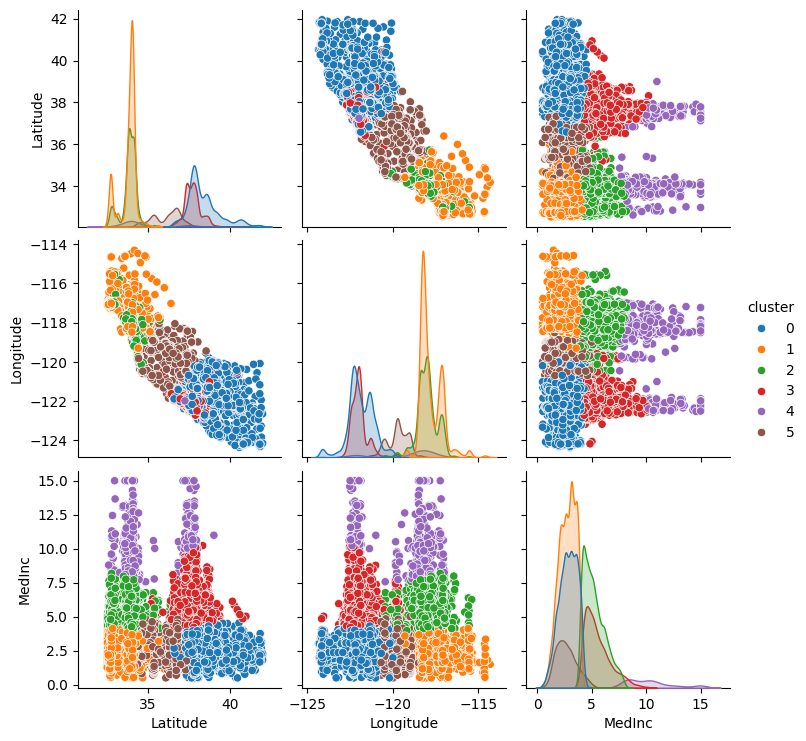

In [36]:
#Plotting Clusters
sns.pairplot(data=df_train, hue='cluster')
plt.show()

In [39]:
#Predict the Test dataset
y_hat = model.predict(df_test)
y_hat

array([1, 3, 2, ..., 2, 5, 4], dtype=int32)

In [40]:
df_test['cluster'] = y_hat

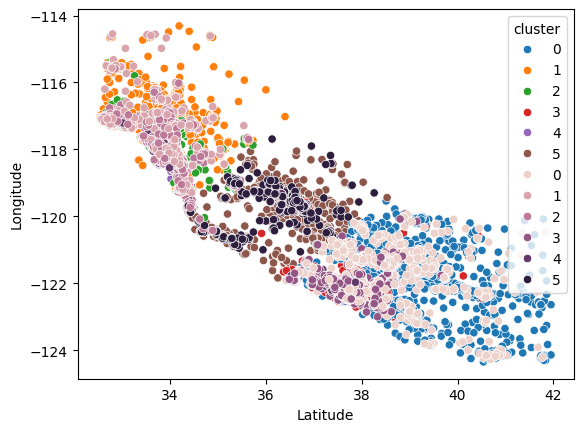

In [42]:
#Latitude	Longitude	MedInc	cluster
sns.scatterplot(data=df_train, x='Latitude', y='Longitude', hue='cluster')
sns.scatterplot(data=df_test, x='Latitude', y='Longitude', hue='cluster')
plt.show()

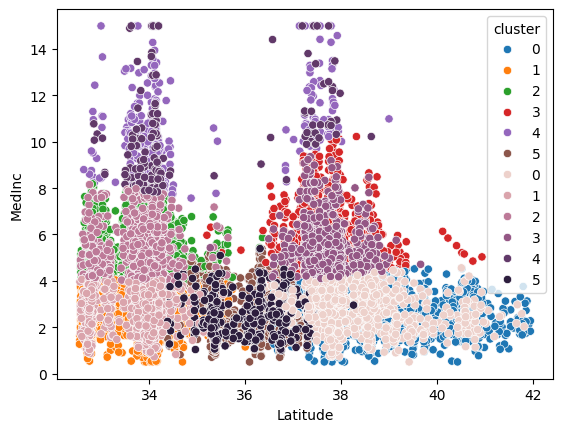

In [43]:
sns.scatterplot(data=df_train, x='Latitude', y='MedInc', hue='cluster')
sns.scatterplot(data=df_test, x='Latitude', y='MedInc', hue='cluster')
plt.show()

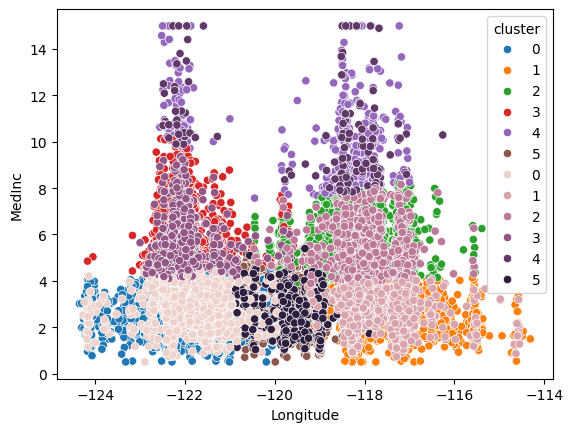

In [44]:
sns.scatterplot(data=df_train, x='Longitude', y='MedInc', hue='cluster')
sns.scatterplot(data=df_test, x='Longitude', y='MedInc', hue='cluster')
plt.show()

In [ ]:
#From the previous results, it is visible that the model predicted very well the test dataset. Because the
# clusters for both datasets (test and train) are overlapped.

In [45]:
# The data does not show a visible relation (linear o any other.)

#Random Forest: -Used to classify or predict continuous numerical values. Combines multiple decision trees.
#               -Image classification for target recognition. 
#               -Prediction of housing prices based on multiple features. 
#               -Diagnosis of diseases based on multiple medical tests.


In [46]:
#RandomForest Clasifier is used.

# ----------- MACHINE LEARNING ----------
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
# ----------- METRICS -------------------
from sklearn.metrics import accuracy_score
#------------ OPTIMIZATION --------------

In [49]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,16512.0,35.637410,2.138897,32.5400,33.930000,34.2600,37.7100,41.9500
Longitude,16512.0,-119.572085,2.002524,-124.3500,-121.800000,-118.5000,-118.0100,-114.3100
MedInc,16512.0,3.858280,1.884181,0.4999,2.562175,3.5351,4.7347,15.0001


In [47]:
#Create train test split
X_train = df_train.drop(['cluster'], axis=1).copy()
y_train = df_train['cluster'].copy()
X_test = df_test.drop(['cluster'], axis=1).copy()
y_test = df_test['cluster'].copy()

In [48]:
X_train

,Latitude,Longitude,MedInc
2594,40.88,-124.06,2.5667
8315,33.34,-118.33,2.8333
5668,33.72,-118.30,3.3397
6838,34.07,-118.13,3.0850
20275,34.19,-119.21,4.7443
...,...,...,...
8112,33.79,-118.20,3.0135
20169,34.42,-119.30,3.5822
4433,34.07,-118.20,1.9937
1006,37.69,-121.75,3.7212


In [51]:
#Se decide aplicar un standard scaler a los datos debido a las diferencias en sus magnitudes
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [52]:
model_rfc = RandomForestClassifier(random_state = 1750)
model_rfc.fit(X_train_sc, y_train)

RandomForestClassifier(random_state=1750)

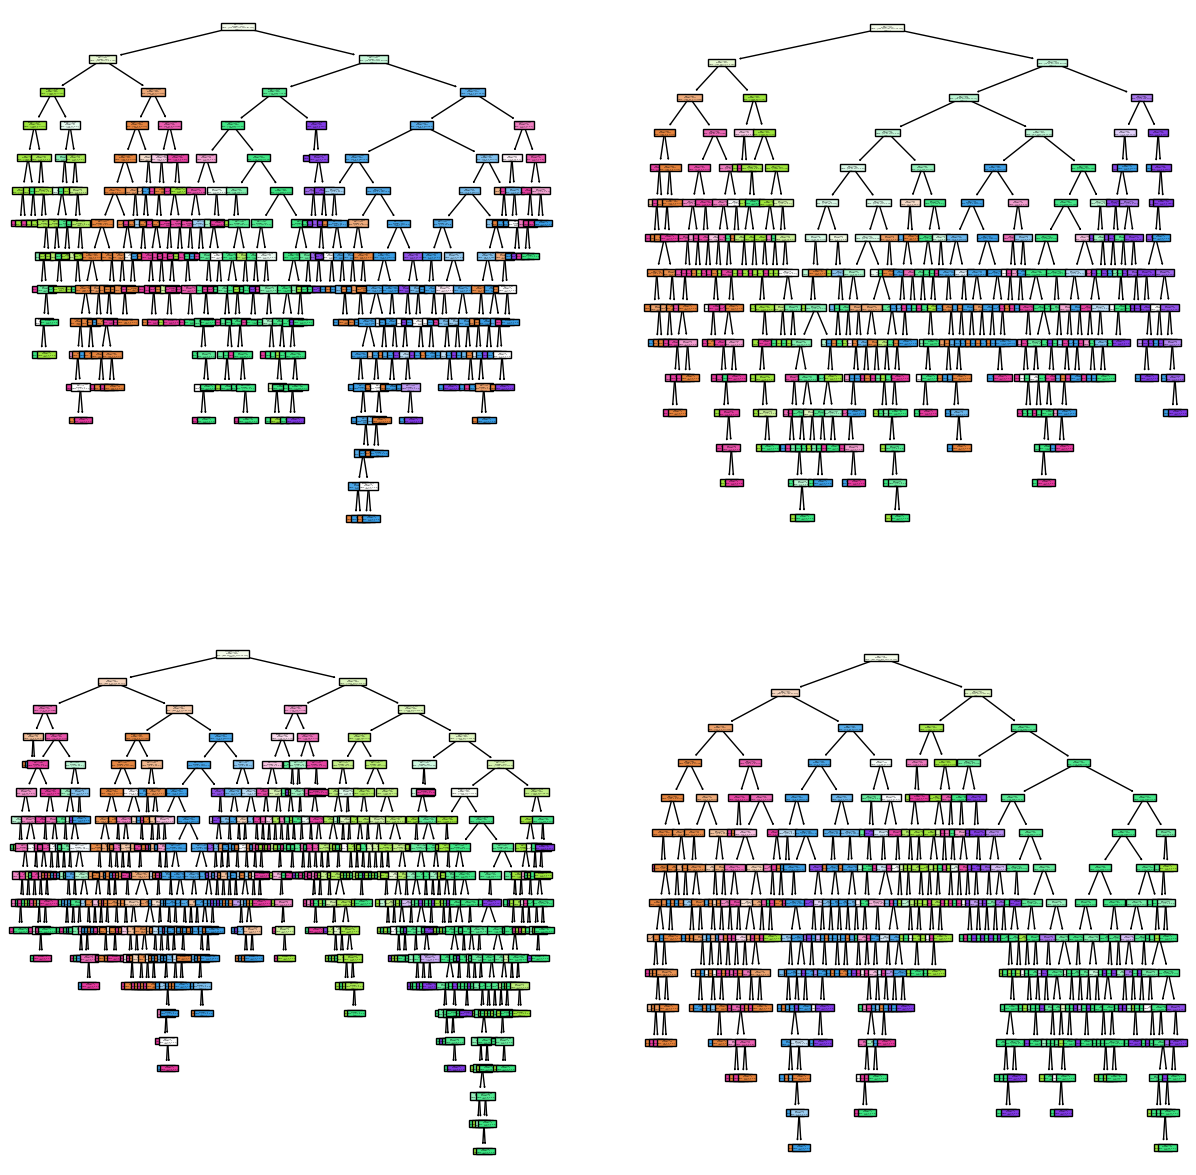

In [54]:
fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# Mostramos los 4 primeros árboles de los 100 generados (por defecto)
tree.plot_tree(model_rfc.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2", "3", "4", "5"], filled = True)
tree.plot_tree(model_rfc.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2", "3", "4", "5"], filled = True)
tree.plot_tree(model_rfc.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2", "3", "4", "5"], filled = True)
tree.plot_tree(model_rfc.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2", "3", "4", "5"], filled = True)

plt.show()

In [55]:
y_hat_rf = model_rfc.predict(X_test_sc)
y_hat_rf

array([1, 3, 2, ..., 2, 5, 4], dtype=int32)

In [56]:
print(f'Accuracy score for Random Forest Classifier: {accuracy_score(y_test, y_hat_rf)}') 

Accuracy score for Random Forest Classifier: 0.9951550387596899
